In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Взглянем на данные

In [32]:
df = pd.read_csv("sql_query.csv")
df.head()

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,model,range,seats,profit,passengers
0,136119,2017-01-03T10:05:00Z,2017-01-03T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1653000.0,113.0
1,136120,2017-02-24T10:05:00Z,2017-02-24T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1605400.0,109.0
2,136122,2017-01-08T10:05:00Z,2017-01-08T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1431000.0,97.0
3,136130,2017-02-13T10:05:00Z,2017-02-13T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1556600.0,107.0
4,136131,2017-01-28T10:05:00Z,2017-01-28T11:45:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1812800.0,124.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   flight_id               127 non-null    int64  
 1   scheduled_departure     127 non-null    object 
 2   scheduled_arrival       127 non-null    object 
 3   scheduled_duration      127 non-null    object 
 4   departure_city          127 non-null    object 
 5   departure_airport_name  127 non-null    object 
 6   arrival_city            127 non-null    object 
 7   arrival_airport_name    127 non-null    object 
 8   model                   127 non-null    object 
 9   range                   127 non-null    int64  
 10  seats                   127 non-null    int64  
 11  profit                  118 non-null    float64
 12  passengers              118 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 13.0+ KB


In [34]:
df[df.passengers.isnull()]

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,model,range,seats,profit,passengers
59,136511,2017-02-21T06:10:00Z,2017-02-21T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
60,136513,2017-02-28T06:10:00Z,2017-02-28T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
61,136514,2017-02-07T06:10:00Z,2017-02-07T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
62,136523,2017-01-10T06:10:00Z,2017-01-10T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
63,136540,2017-01-17T06:10:00Z,2017-01-17T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
64,136544,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
65,136546,2017-01-03T06:10:00Z,2017-01-03T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
66,136560,2017-01-24T06:10:00Z,2017-01-24T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN
67,136567,2017-02-14T06:10:00Z,2017-02-14T11:15:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Витязево,Новокузнецк,Спиченково,Boeing 737-300,4200,130,NaN,NaN


### Работа с данными

В датасете отсутствует информация о пассажирах и сумме проданных билетов на рейсах в Новокузнецк.  
Удалим информацию по Новокузнецку.

In [35]:
df = df[df.arrival_city != 'Новокузнецк']

Переведем колонки "scheduled_departure" и "scheduled_arrival" в формат datetime

In [36]:
df.scheduled_departure = pd.to_datetime(df.scheduled_departure)
df.scheduled_arrival = pd.to_datetime(df.scheduled_arrival)

Переведем длительность рейса в часы

In [37]:
def convert_to_hours(row):
    minutes = int(row.split(" ")[6]) + int(row.split(" ")[8]) / 60
    return minutes

In [38]:
df['flight_duration'] = df.scheduled_duration.apply(convert_to_hours)

Создадим дополнительный признак отображающий загрузку самолета в процентах

In [39]:
df['loading'] = df.passengers / df.seats

Согласно информации министерства транспорта РФ (www.favt.gov.ru), в 2017 году, стоимость тонны топлива в аэропорту Анапы варьировалась в районе 45000 рублей

К сожалению, производители не предоставляют информацию о расходе топлива, по данным из сети интернет расход самолета "Сухой Суперджет-100" - 1,7 т/ч, "Boeing 737-300" - 2,6 т/ч. 

Рассчитаем стоимость топлива

In [40]:
def fuel_consumption(row):
    if row.model == 'Sukhoi Superjet-100':
        return 1.7
    elif row.model == 'Boeing 737-300':
        return 2.6

In [41]:
df['fuel_consumption'] = df.apply(fuel_consumption, axis=1)

In [42]:
df['fuel_cost'] = df.fuel_consumption * df.flight_duration * 45000

Посчитаем прибыль за вычетом стоимости топлива

In [43]:
df['earnings'] = df.profit - df.fuel_cost

Определим долю затрат на топливо

In [44]:
df['share_of_costs'] = 1 - df['earnings'] / df['profit']

In [45]:
df['share_of_costs'].mean()

0.10503040314242293

### Себестоимость полета

В среднем, затраты составлют 10,5%. Согласно информации US Airways Group и The Wall Stree Journal, доля затрат на билеты составляет 29%. Но, также согласно этих данных прибыль авиакомпании составляет всего 1%. Маловероятно, что это соответствует истине.

![Расходы на полёт](images/flight_expenses.jpg)

Но, на самом деле схема затрат намного сложнее. В соответствии с классификацией эксплуатационных расходов предложенной IATA, схема расходов выглядит так.

![](images/IATA_flight_expenses.jpg)

Оставим подсчет себестоимости рейса профессионалам. А мы проведем анализ на основе загрузки самолета и затратам на топливо.

### Визуализируем данные

<AxesSubplot:xlabel='scheduled_departure', ylabel='count'>

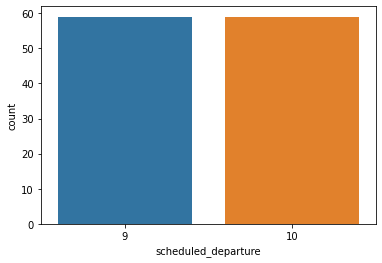

In [56]:
# Вылет осуществляется только в 9 и 10 часов
sns.countplot(df.scheduled_departure.dt.hour)

<AxesSubplot:xlabel='arrival_city', ylabel='count'>

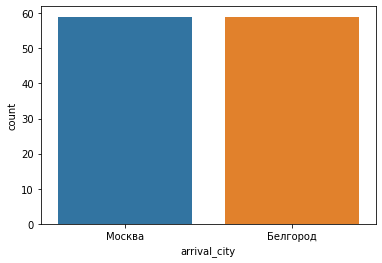

In [58]:
# Самолеты летаеют в Москву и Белгород в равном количстве
sns.countplot(df.arrival_city)

<AxesSubplot:xlabel='model', ylabel='count'>

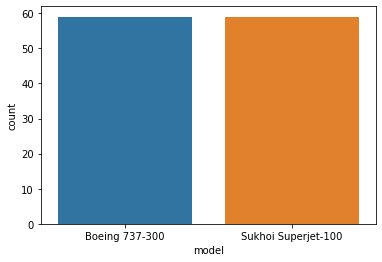

In [68]:
# В зависмости от города назначения авиакомпании используют разные модели самолетов
sns.countplot(df.model)

##### Построим графики на основе прибыли

<AxesSubplot:xlabel='earnings', ylabel='passengers'>

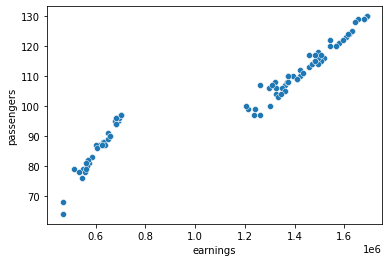

In [69]:
sns.scatterplot(x=df.earnings, y=df.passengers)

<AxesSubplot:xlabel='earnings', ylabel='Count'>

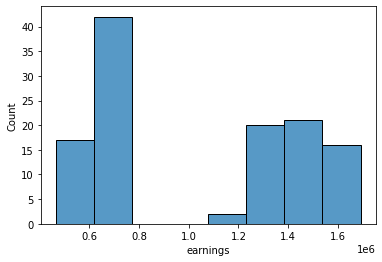

In [71]:
sns.histplot(df.earnings)

In [75]:
df[df.earnings < 800_000].sample(3)

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,model,range,seats,profit,passengers,flight_duration,loading,fuel_consumption,fuel_cost,earnings,share_of_costs
98,136778,2017-02-22 09:25:00+00:00,2017-02-22 10:15:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Витязево,Белгород,Белгород,Sukhoi Superjet-100,3000,97,759000.0,96.0,0.833333,0.989691,1.7,63750.0,695250.0,0.083992
112,136861,2017-02-12 09:25:00+00:00,2017-02-12 10:15:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Витязево,Белгород,Белгород,Sukhoi Superjet-100,3000,97,689100.0,87.0,0.833333,0.896907,1.7,63750.0,625350.0,0.092512
122,136936,2017-01-02 09:25:00+00:00,2017-01-02 10:15:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Витязево,Белгород,Белгород,Sukhoi Superjet-100,3000,97,632400.0,82.0,0.833333,0.845361,1.7,63750.0,568650.0,0.100806


In [76]:
df[df.earnings > 800_000].sample(3)

,flight_id,scheduled_departure,scheduled_arrival,scheduled_duration,departure_city,departure_airport_name,arrival_city,arrival_airport_name,model,range,seats,profit,passengers,flight_duration,loading,fuel_consumption,fuel_cost,earnings,share_of_costs
12,136178,2017-01-29 10:05:00+00:00,2017-01-29 11:45:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1434600.0,99.0,1.666667,0.761538,2.6,195000.0,1239600.0,0.135926
20,136249,2017-02-14 10:05:00+00:00,2017-02-14 11:45:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1800600.0,123.0,1.666667,0.946154,2.6,195000.0,1605600.0,0.108297
11,136172,2017-01-15 10:05:00+00:00,2017-01-15 11:45:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Витязево,Москва,Шереметьево,Boeing 737-300,4200,130,1617600.0,110.0,1.666667,0.846154,2.6,195000.0,1422600.0,0.120549


Как видно выше, на графиках, есть явный пробел в прибыли рейсов. Это обосновыывается тем, что рейсы в Белгород менее прибыльные. Поэтому, имеет смысл разделить датасет на 2 части: рейсы в Москву и рейсы в Белгород.

In [109]:
moscow = df[df.arrival_city == "Москва"]
belgorod = df[df.arrival_city == "Белгород"]

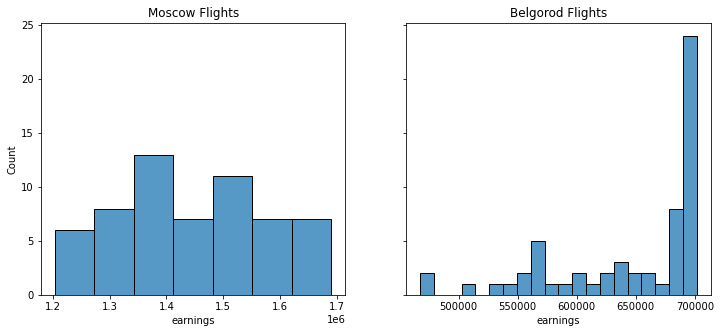

In [116]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

sns.histplot(data=moscow.earnings, ax=axes[0])
axes[0].set_title("Moscow Flights")

sns.histplot(belgorod.earnings, ax=axes[1], bins=20)
axes[1].set_title("Belgorod Flights")

plt.show()

На рейсах в Москву мы видим нормальное распределение признака. Однако, на рейсах в Белгород видно явное смещение вправо.

Text(0.5, 1.0, 'Dependence of Earnings on the Loading - Belgorod')

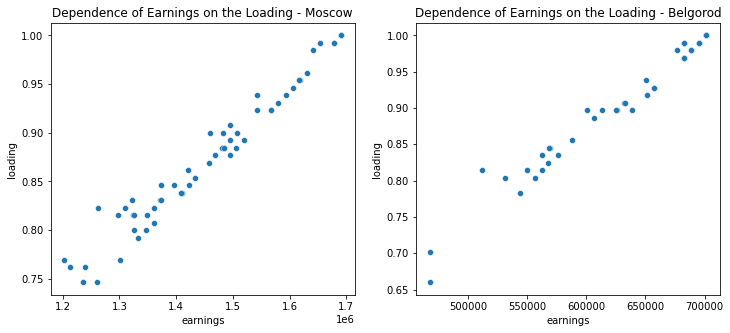

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=moscow.earnings, y=moscow.loading, ax=axes[0])
axes[0].set_title("Dependence of Earnings on the Loading - Moscow")

sns.scatterplot(x=belgorod.earnings, y=belgorod.loading, ax=axes[1])
axes[1].set_title("Dependence of Earnings on the Loading - Belgorod")

Мы наблюдаем линейный рост зароботка в зависимости от количества пассажиров.

In [119]:
df.scheduled_arrival.dt.weekday

0      1
1      4
2      6
3      0
4      5
      ..
122    0
123    1
124    3
125    0
126    5
Name: scheduled_arrival, Length: 118, dtype: int64